In [1]:
!pip install pymysql


In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="Preetham@2218",
    database="online_sales"
)
print("✅ Connected to MySQL successfully!")


✅ Connected to MySQL successfully!


In [4]:
df_tables = pd.read_sql("SHOW TABLES;", conn)
df_tables


C:\Users\Acer\AppData\Local\Temp\ipykernel_22264\1556919653.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tables = pd.read_sql("SHOW TABLES;", conn)


,Tables_in_online_sales
0,orders


In [5]:
# Load the 'orders' table into a DataFrame
df_orders = pd.read_sql("SELECT * FROM orders;", conn)

# Show the first few rows
df_orders.head()


C:\Users\Acer\AppData\Local\Temp\ipykernel_22264\338793114.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders = pd.read_sql("SELECT * FROM orders;", conn)


,order_id,order_date,amount
0,1,2023-01-01,82.0
1,2,2023-01-02,363.0
2,3,2023-01-03,478.0
3,4,2023-01-04,107.0
4,5,2023-01-05,478.0


In [6]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])


In [7]:
df_orders['year'] = df_orders['order_date'].dt.year
df_orders['month'] = df_orders['order_date'].dt.month


In [8]:
monthly_sales = df_orders.groupby(['year', 'month']).agg(
    total_revenue=('amount', 'sum'),
    total_orders=('order_id', 'count')
).reset_index()
monthly_sales


,year,month,total_revenue,total_orders
0,2023,1,8995.0,31
1,2023,2,7945.0,28
2,2023,3,409.0,1


C:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


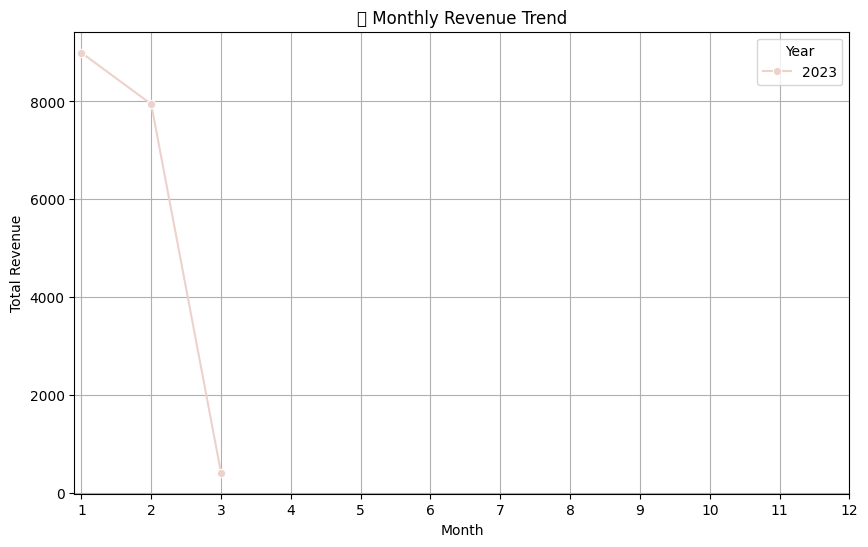

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="month", y="total_revenue", hue="year", marker="o")

plt.title("📊 Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13))  # Ensure x-axis has months 1 to 12
plt.grid(True)
plt.legend(title="Year")
plt.show()


C:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


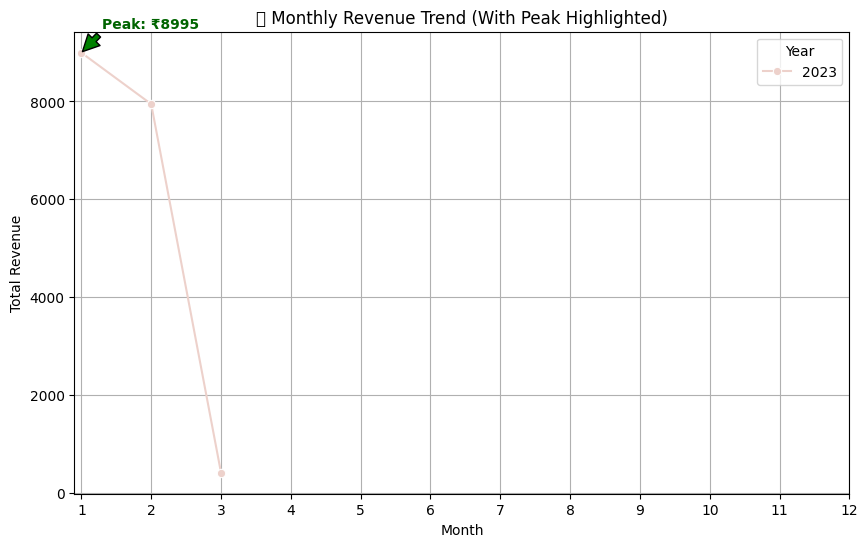

In [11]:
# First, find the peak month data point
peak = monthly_sales.sort_values('total_revenue', ascending=False).iloc[0]

# Plot the line chart again
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="month", y="total_revenue", hue="year", marker="o")

# Annotate the peak month on the plot
plt.annotate(
    f"Peak: ₹{int(peak.total_revenue)}",     # Text to display
    xy=(peak.month, peak.total_revenue),     # Point to mark (x, y)
    xytext=(peak.month + 0.3, peak.total_revenue + 500),  # Position of text
    arrowprops=dict(facecolor='green', shrink=0.05),
    fontsize=10, color='darkgreen', weight='bold'
)

plt.title("📊 Monthly Revenue Trend (With Peak Highlighted)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title="Year")
plt.show()


In [12]:
print("🧾 Summary Stats:")
print(f"Total Revenue: ₹{df_orders['amount'].sum():,.2f}")
print(f"Average Order Value: ₹{df_orders['amount'].mean():,.2f}")
print(f"Total Orders: {df_orders['order_id'].nunique()}")
print(f"Date Range: {df_orders['order_date'].min().date()} to {df_orders['order_date'].max().date()}")


🧾 Summary Stats:
Total Revenue: ₹17,349.00
Average Order Value: ₹289.15
Total Orders: 60
Date Range: 2023-01-01 to 2023-03-01
